In [1]:
import numpy as np
import pandas as pd
from osgeo import gdal

In [2]:
testTif = gdal.Open("H:/Population/LandScan_global/Aggregate/landscan-global-2013.tif")

test_width = testTif.RasterXSize  # 栅格矩阵的列数
test_height = testTif.RasterYSize  # 栅格矩阵的行数
test_bands = testTif.RasterCount  # 波段数

print(test_width, test_height, test_bands)

360 180 1


In [3]:
#仿射矩阵，左上角像素的大地坐标和像素分辨率。
#共有六个参数，分表代表左上角x坐标；东西方向上图像的分辨率；如果北边朝上，地图的旋转角度，0表示图像的行与x轴平行；左上角y坐标；
#如果北边朝上，地图的旋转角度，0表示图像的列与y轴平行；南北方向上地图的分辨率。
test_geotrans = testTif.GetGeoTransform()
test_geotrans

(-180.0, 0.9999999999996001, 0.0, 89.99999999992801, 0.0, -0.9999999999996001)

In [4]:
# 用ReadAsArray(<xOff>, <yOff>, <xSize>, <ySize>)，读出从(xOff,yOff)开始，大小为(xSize,ySize)的矩阵。
testBand = testTif.GetRasterBand(1)
testData = testBand.ReadAsArray(0, 0, test_width, test_height)

testData

array([[-2147483647, -2147483647, -2147483647, ..., -2147483647,
        -2147483647, -2147483647],
       [-2147483647, -2147483647, -2147483647, ..., -2147483647,
        -2147483647, -2147483647],
       [-2147483647, -2147483647, -2147483647, ..., -2147483647,
        -2147483647, -2147483647],
       ...,
       [          0,           0,           0, ...,           0,
                  0,           0],
       [          0,           0,           0, ...,           0,
                  0,           0],
       [          0,           0,           0, ...,           0,
                  0,           0]])

In [5]:
testData[testData < 0] = -9999.0
testData

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_10056\2360885876.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


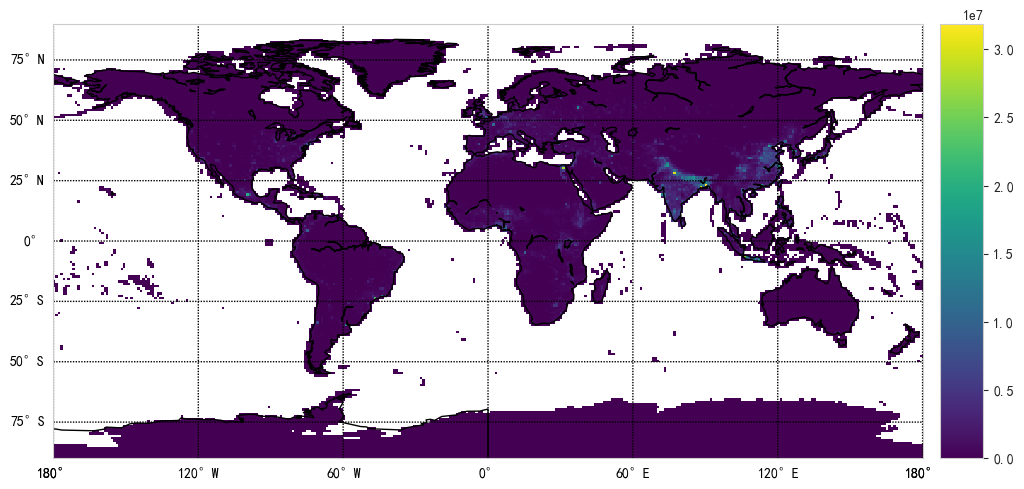

In [11]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

testData = np.flip(testData, axis=0)  # 坐标原因，需要上下颠倒

mapPlot = Map.pcolor(x, y, testData, cmap='viridis', vmin=0.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [8]:
width = 360
height = 180
in_folder = 'H:/Population/LandScan_global/Aggregate/'
out_folder = 'H:/Population/LandScan_global/npy_sum/'

for year in range(2013, 2023):
    tif = gdal.Open(in_folder + f"landscan-global-{year}.tif")
    band = tif.GetRasterBand(1)
    data = band.ReadAsArray(0, 0, width, height)
    data[data < 0] = -9999.0
    data = np.flip(data, axis=0)  # 磁场颠佬
    np.save(out_folder + f"LandScan_global_{year}.npy", data)

In [9]:
test = np.load(out_folder + "landscan-global-2022.npy")

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=-180., llcrnrlat=-90., urcrnrlon=180., urcrnrlat=90.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, test, cmap='viridis', vmin=0.0, vmax=500.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'H:/Population/LandScan_global/npy_sum/landscan-global-2022.npy'